<a href="https://colab.research.google.com/github/12345997/WEEK-8-IP/blob/main/WEEK_8_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Defining the Question
#a).Specifying the Question


```
` To study the factors that cause hypothyroidism & build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.`

```




###b) Defining the Metric for Success
Determine whether or not the patient's symptoms indicate that the patient has hypothyroid.

Use my model to determine which features are most impactful in influencing the prediction for the models created. The aim of the model is:

Achieve an Accuracy above 90%
Achieve F1 score above 90%

###c) Understanding the context
Nairobi Hospital conducted a clinical camp to test for hypothyroidic disease. The data collected focused on focused majorly on Thyroid patients.

The thyroid gland main function is releasing and controlling thyroid hormones that control metabolism. If the body makes too much thyroid hormone, you can develop a condition called hyperthyroidism. If the body makes too little thyroid hormone, it’s called hypothyroidism.

Other terms within my dataset were

Thyroid Stimulating Hormone (TSH) - rises whenever the thyroid gland fails to produce sufficient thyroid hormone. When there is too much thyroid hormone present in the serum, the brain responds by lowering the TSH. It is High in hyperthyroidism and Low in hypothyroidism.

Thyroid binding globulin(TBG) - plasma proteins.

Triiodothyronine (T3) - High in hyperthyroidism and Low in hypothyroidism.

Total thyroxine (TT4) - High in hyperthyroidism and Low in hypothyroidism. It is usually slightly High during pregnancy because of increased levels of TBG.

Free Thyroxine Index (FTI) - considered a more reliable indicator of thyroid status and is High in hyperthyroidism and Low in hypothyroidism.

A low TSH and low TT4 are the main indicators of hypothyroidism

The commonly affected gender by Thyroid disease are the females while in males is lower

###d) Recording the Experimental Design
I will create the models using two Algorthms

 

1.   Decision Trees- Random forests, Ada boosted trees,gradient boosted.
2.   Support Vectors Machines (SVM) - Polynomial, linear and rbf kernel function




#2 Importing the libraries and previewing the dataset

In [19]:
#importing the libraries i'm going to use for my anaalysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn_pandas import DataFrameMapper, CategoricalImputer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [20]:
Thyroid_data=pd.read_csv("/content/hypothyroid.csv")
Thyroid_data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [21]:
#viewing our dataset last 5 rows
Thyroid_data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [22]:
#checking our dataset infomation
Thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

#3.Data cleaning

In [23]:
#Checking the general data decription for underrstanding the dataset better
Thyroid_data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [24]:
Thyroid_data = Thyroid_data.drop(['TBG'], axis =1)

In [25]:
#checking for null values inour dataset
Thyroid_data.isnull().sum()
#i found out that the dataset had no null values
#moreover, "?" is cosidered a nun null values hence i have to do away with it

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

In [26]:
#Replacing '?' with zeros

Thyroid_data = Thyroid_data.replace(['?'], np.nan)
Thyroid_data.isnull().sum().sum()

# There are 5329 entries with the '?' symbol


2426

In [27]:
#rechecking the datatypes
Thyroid_data.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
dtype: object

In [28]:
# changing the column datatypes 
# and categorical columns

Thyroid_data = Thyroid_data

categorical_clmn = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

# Numerical columns array 
numerical_clmn = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']


# Using a conditional for loop to convert each columns into the right data types

for column in Thyroid_data.columns:
  if column in numerical_clmn:
    Thyroid_data[column]= pd.to_numeric(Thyroid_data[column])
  
  else:
    Thyroid_data[column] = Thyroid_data[column].astype('category')
    
    
# Confirming changes

Thyroid_data.dtypes

# The data types have now been set correctly

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
dtype: object

In [29]:
#Replacing the null values with zeroes


numerical_columns = ['TSH','T3', 'TT4', 'T4U', 'FTI']

#dropping the null values and assigning the resultant values to a new dataframe
Thyroid_data[numerical_columns] = Thyroid_data[numerical_columns].fillna(0)

In [30]:
Thyroid_data.age.unique()

array([72., 15., 24., 77., 85., 64., 20., 42., 69., 75., 53., 59., 68.,
       50., 78., 65., 28., 43., 40., 84., nan, 83., 63., 73., 36., 27.,
       48., 71., 60., 34., 79., 62., 74., 32., 41., 70., 29.,  5., 58.,
       35., 51., 22., 16., 44., 39., 47., 18., 17., 88., 56., 30., 45.,
       66., 52., 54., 80., 33., 38., 92., 67., 46., 13., 89., 61., 49.,
       26., 57., 31., 90., 81., 25., 37., 76., 87., 23., 55., 86., 98.,
       21., 97.,  1.,  6., 14., 82., 11., 19.,  9., 12., 10.,  8.,  7.,
        4., 93.])

In [31]:
Thyroid_data['age'].fillna(Thyroid_data['age'].mean(),inplace=True)

In [32]:
Thyroid_data['age'].apply(np.ceil)

0       72.0
1       15.0
2       24.0
3       24.0
4       77.0
        ... 
3158    58.0
3159    29.0
3160    77.0
3161    74.0
3162    56.0
Name: age, Length: 3163, dtype: float64

In [33]:
#checking the  Number of duplicated rows

Thyroid_data.duplicated().sum()

152

In [34]:
# Dropping of duplicated  

Thyroid_data = Thyroid_data.drop_duplicates()

# Confirming the dropping of duplicates

Thyroid_data.duplicated().sum()

# 0 indicates there are no duplicated entries

0

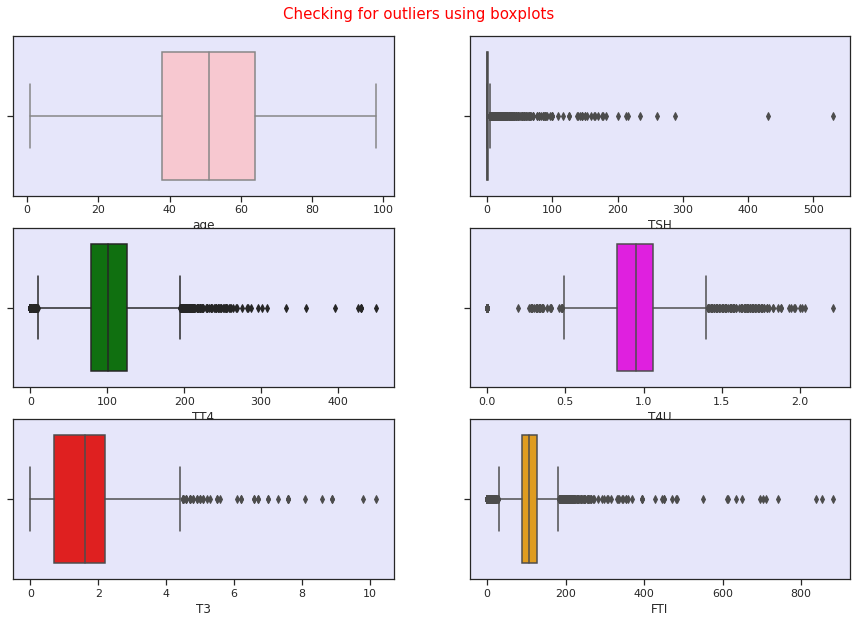

In [35]:
##Using a boxplot to check for outliers


import seaborn as sns

columns= ['age', 'TSH', 'TT4', 'T4U', 'T3', 'FTI', 'TBG']
colors = ['pink', 'yellow', 'green', 'fuchsia', 'red', 'orange']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'red')
for ax, data, column, color in zip(axes.flatten(), Thyroid_data, columns, colors):
  sns.boxplot(Thyroid_data[column], ax = ax, color = color)
  ax.set_facecolor('lavender')
  

# The boxplots above indicate the extent of outliers in each of the above columns

#4.Exploratory analysis

###Numerical data analysis

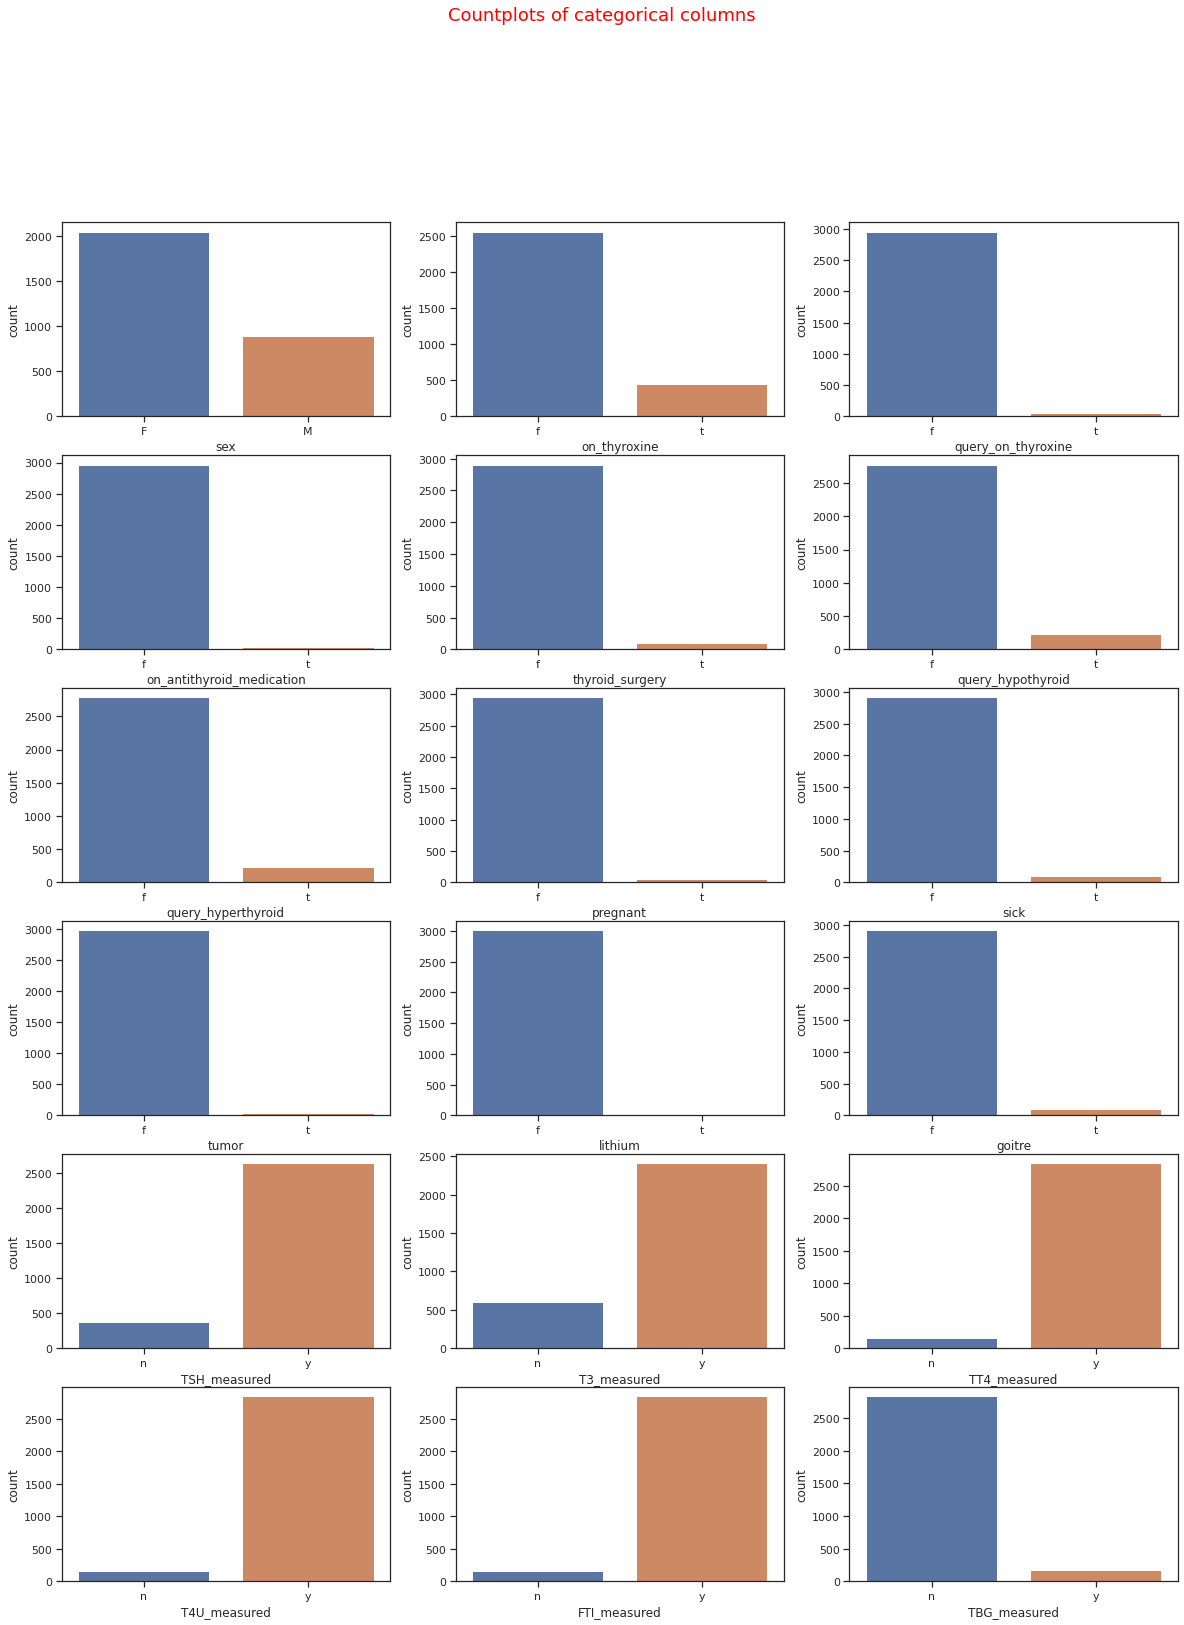

In [36]:
# Count plot of categorical columns in the dataset
import seaborn as sb
categorical_columns =[ 'sex', 'on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'TSH_measured', 'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured', 'TBG_measured']


sb.set(style = 'ticks', context = 'notebook')
corr = Thyroid_data.corr()
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'red')
for ax, data, column in zip(axes.flatten(), Thyroid_data, categorical_columns):
   sb.countplot(Thyroid_data[column], ax=ax)

##Bivariate analysis

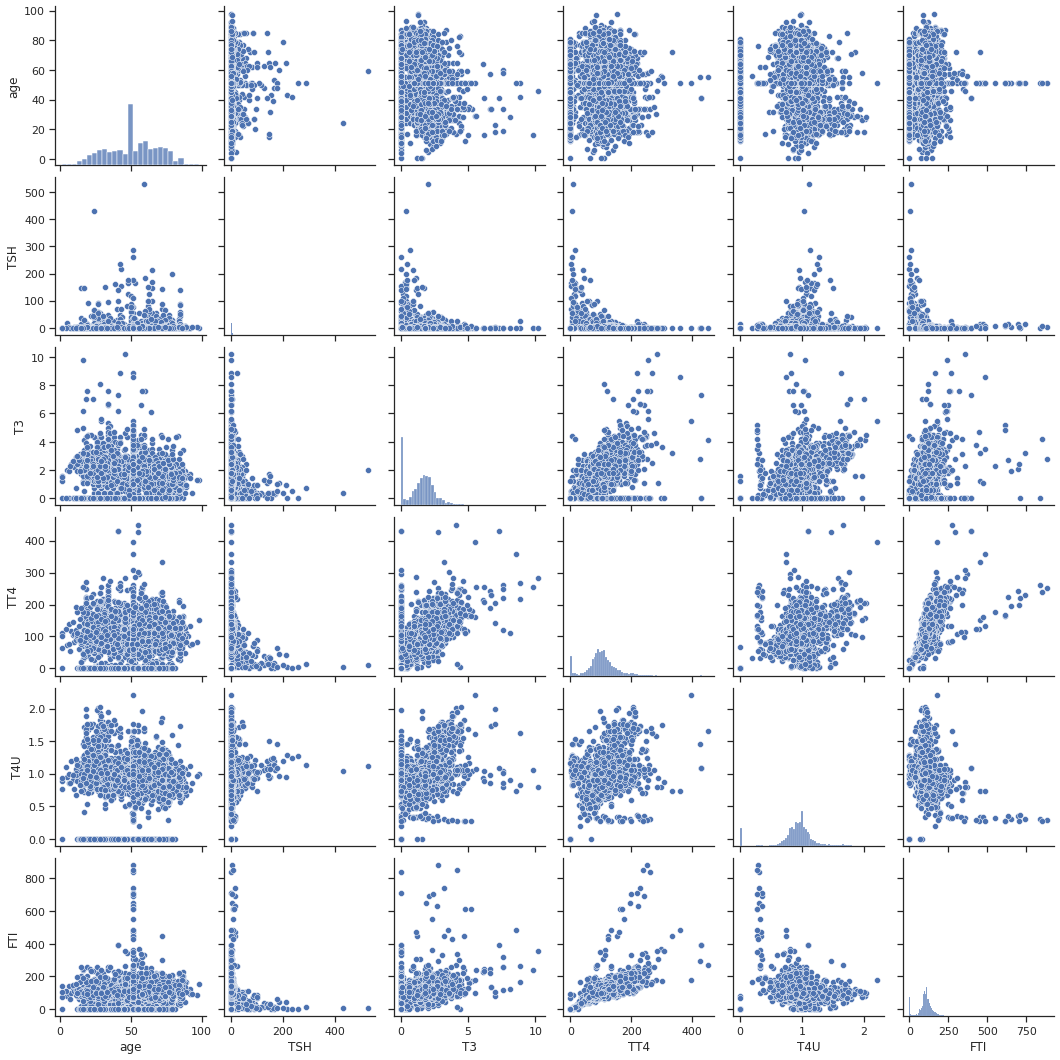

In [37]:
#using pair plots to check the correlation in our dataset

sns.pairplot(Thyroid_data, kind = 'scatter', dropna = False)
plt.show()

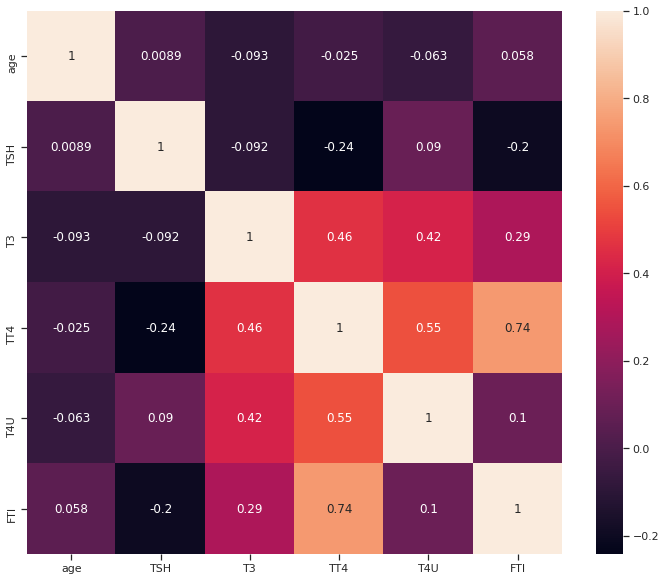

In [38]:
# Checking the correlation of our dataset using a heatmap

plt.figure(figsize=(12,10))
sb.heatmap(corr, annot = True)
plt.show()

In [39]:
# Checking the correlation in our dataset variables
corr = Thyroid_data.corr()
corr

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,0.008882,-0.092772,-0.024667,-0.063006,0.057734
TSH,0.008882,1.000000,-0.092486,-0.242139,0.089875,-0.199480
T3,-0.092772,-0.092486,1.000000,0.463470,0.417634,0.290009
TT4,-0.024667,-0.242139,0.463470,1.000000,0.546467,0.738844
T4U,-0.063006,0.089875,0.417634,0.546467,1.000000,0.100747
FTI,0.057734,-0.199480,0.290009,0.738844,0.100747,1.000000


#5.Solution implemenation using Logistic redression

In [40]:
Thyroid_data.isnull().sum()

status                        0
age                           0
sex                          73
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
TBG_measured                  0
dtype: int64

In [41]:

# Creating a baseline model, i.e logistic regression
# Importing the relevant libraries

from sklearn.linear_model import LogisticRegression

X = Thyroid_data.drop('status', axis=1)

X = pd.get_dummies(X)

#train_features = X
y = Thyroid_data.status.cat.codes

# Split the independent and dependent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

In [42]:
#checking the accuraacy of our built model
print('accuracy_score:',accuracy_score (y_test , y_pred))
print('F1_score:',f1_score(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

# The Baseline Model has an accuracy score of 98% as seen from the F1 score

accuracy_score: 0.9856194690265486
F1_score: 0.9925330269959795


array([[ 27,   8],
       [  5, 864]])

#6.Decision Trees

###Random trees

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 10, max_depth=5)

forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.head(5)

,Actual,Predicted
2141,1,1
566,1,1
2714,1,1
2600,1,1
1941,1,1


In [45]:
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_test,y_pred))

print('accuracy_score:',accuracy_score (y_test , y_pred))

print('F1_score:',f1_score(y_test, y_pred))

R2 score : 0.67
accuracy_score: 0.9867330016583747
F1_score: 0.9931153184165232


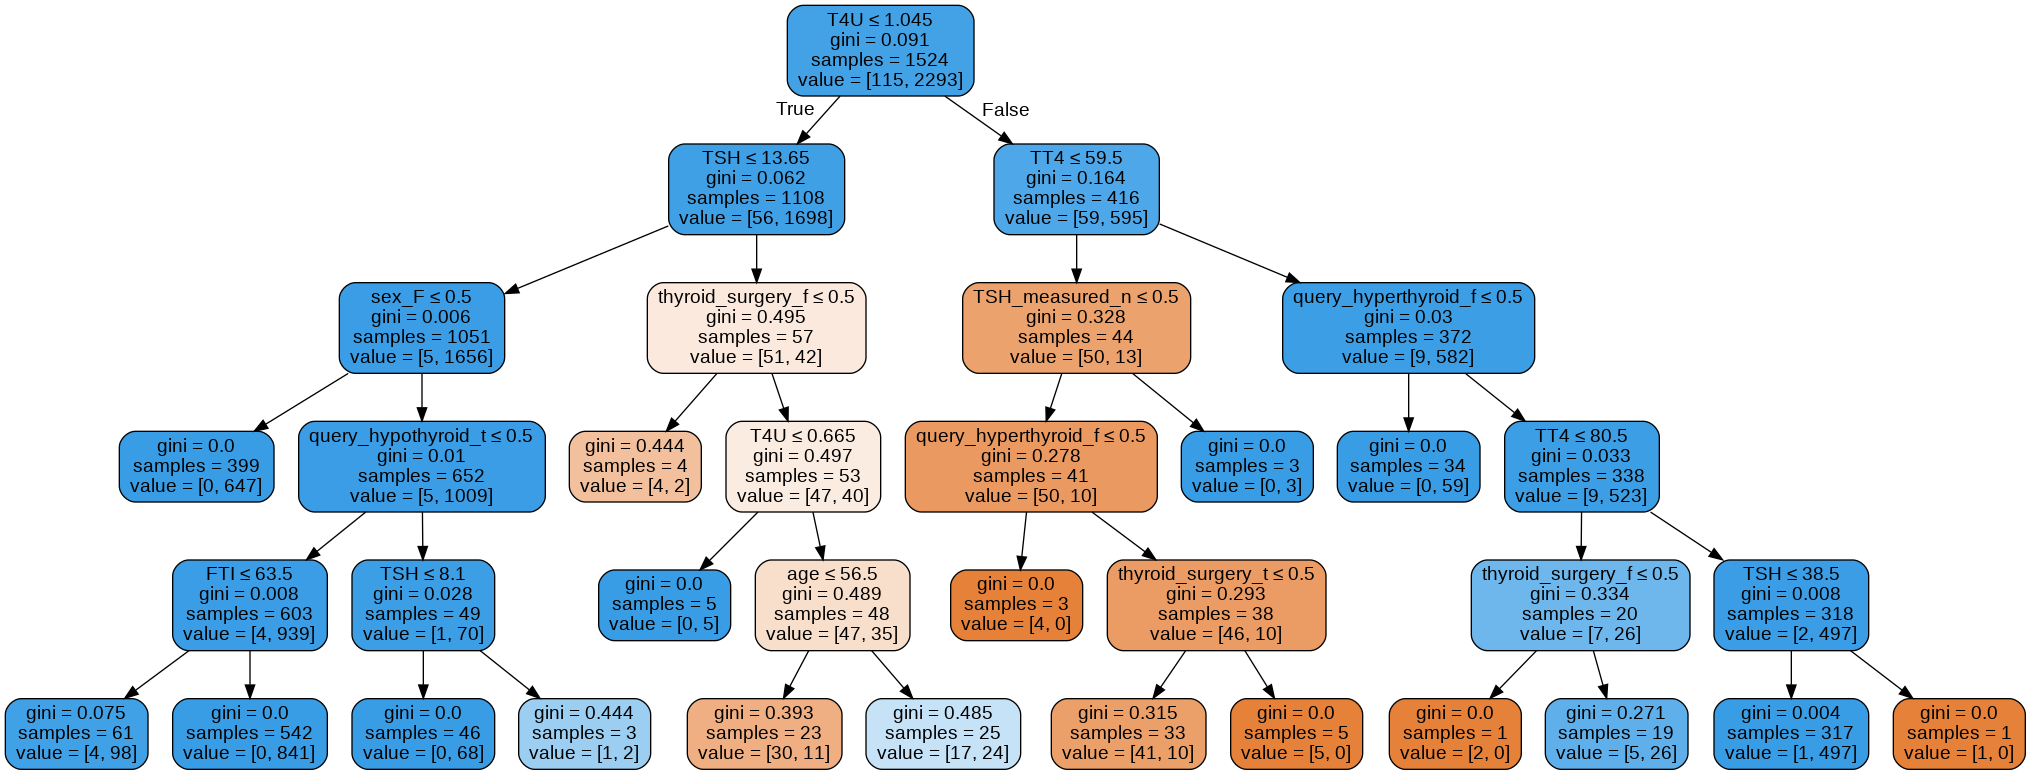

In [47]:
# Visualizing tree  50

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

y_pred = forest.predict(X_test)
dot_data = StringIO()

# picking a specific tree from the forest; 

tree = forest.estimators_[3]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_Test.png')
Image(graph.create_png())

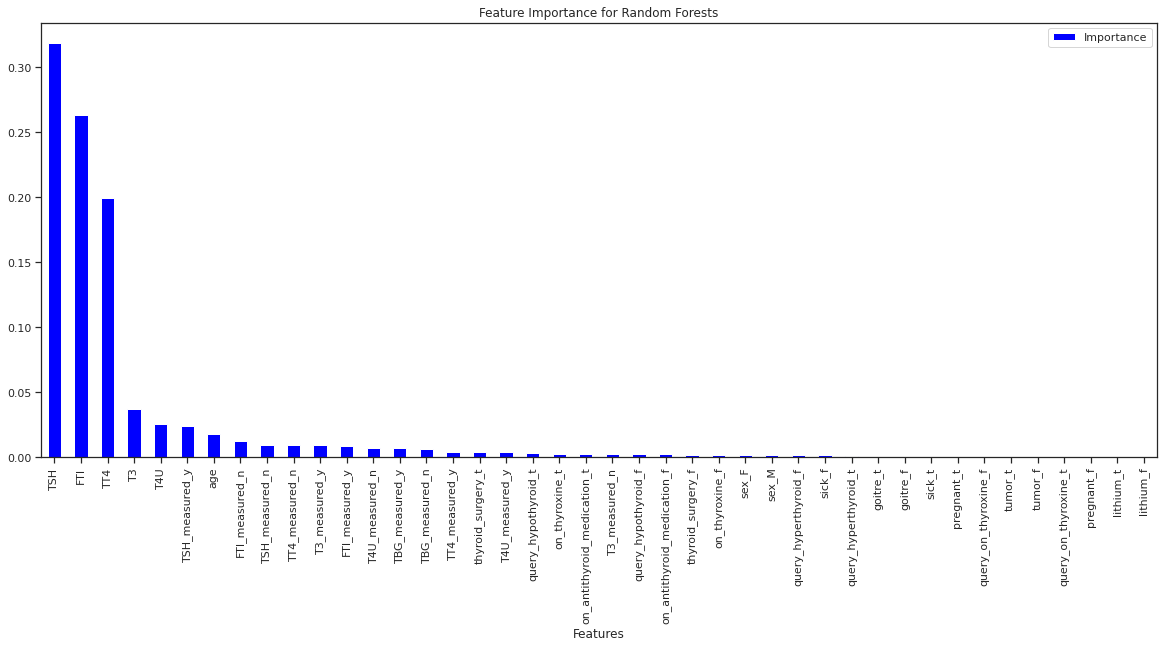

In [48]:
# checking for the feature importances

pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Feature Importance for Random Forests',figsize = (20, 8), color = 'blue')
plt.show()

###Ada boosted trees

In [49]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

params = {'n_estimators' : [250, 300, 450, 500, 600]}

ada_boost = AdaBoostClassifier()

search = GridSearchCV(ada_boost, scoring = 'accuracy', param_grid = params, cv = 10)

search.fit(X, y)

search.best_params_

{'n_estimators': 250}

In [50]:
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=250, random_state=5)

ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_ada))

print('F1_score:',f1_score(y_test, y_pred))
# The accuracy score is 99.3 which is a very high score

Accuracy score: 0.9933665008291874
F1_score: 0.9931153184165232


#7.Gradient Boosted Trees

In [51]:
# Importing the relevant libraries

from sklearn.ensemble import GradientBoostingClassifier

target_number_of_trees = 250

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred_ada))
print("R2 score : %.2f" % r2_score(y_test,y_pred_gbc))
print('F1_score:',f1_score(y_test, y_pred))

Accuracy score: 0.9933665008291874
R2 score : -0.04
F1_score: 0.9931153184165232


#8.Support Vector Machine Model

In [52]:
# Kernel = Polynomial
# Selecting the independent variables and the target variable
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
X = Thyroid_data[['FTI', 'TSH']].values
y = np.where(Thyroid_data.status == 'hypothyroid', 1, 0)

# Instantiating and creating a list of models for iteration
#
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
  # Standardising the data
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Measuring the accuracy of the model
  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  f1 = [f1]
  # Returning the accuracy and the model
  return acc, f1, model

In [53]:
# Getting the accuracies of  models  using a for loop
#
for model, name in zip(models, model_names):
  print(f'The accuracy score of {name} is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')

The accuracy score of Polynomial is: 0.9834070796460177 and the f1 score is: [0.7457627118644068]
The accuracy score of Linear is: 0.9800884955752213 and the f1 score is: [0.71875]
The accuracy score of Rbf is: 0.9834070796460177 and the f1 score is: [0.7692307692307692]



#9.Conclusion
After a thorough and exhaustive analysis using the models above, we see that the difference between the different models accuracy scores does not have a very big margin.

However the Ada Boost and Gradient Descent Decision Trees have the highest accuracy scores and would thus recommend this to be used for analysis.


#10 Follow up questions
At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

`a). Did we have the right data?` **YES**

`b). Do we need other data to answer our question?` **NO**

`c). Did we have the right question?` **YES**